In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Loading and reading data

data = pd.read_csv("/content/drive/MyDrive/AI_Project/hearing_loss_dataset.csv")

In [ ]:
data.head()

,Observation,R_AC_250_Hz,R_AC_500_Hz,R_AC_1K_Hz,R_AC_2K_Hz,R_AC_4K_Hz,R_BC_250_Hz,R_BC_500_Hz,R_BC_1K_Hz,R_BC_2K_Hz,...,R_Diagnosis,L_Diagnosis,Unnamed: 25,R_Average,L_Average,Unnamed: 28,R_Pr_Disability,L_Pr_Disability,Unnamed: 31,Total Disability
0,1,120,115,110,115,115,5,0,10,20,...,Profound Hearing Loss,Moderately Severe Sensorineural Hearing Loss,NaN,113.75,66.50,NaN,100.00,51.97,NaN,59.975000
1,2,100,95,90,95,95,120,105,95,110,...,Profound Hearing Loss,Normal Hearing,NaN,93.75,9.00,NaN,98.14,0.00,NaN,16.356667
2,3,100,120,120,115,115,100,120,120,115,...,Profound Hearing Loss,Moderate Sensorineural Hearing Loss,NaN,117.50,45.50,NaN,100.00,14.00,NaN,28.333333
3,4,100,120,120,115,115,50,45,55,65,...,Profound Hearing Loss,Moderately Severe Conductive Hearing Loss,NaN,117.50,64.75,NaN,100.00,48.55,NaN,57.125000
4,5,100,100,85,85,80,5,15,20,45,...,Severe Mixed Hearing Loss,Minimal Mixed Hearing Loss,NaN,87.50,18.50,NaN,87.88,0.00,NaN,14.646667


In [ ]:
# Visualizing data

data.info()
print('')
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Observation       5000 non-null   int64  
 1   R_AC_250_Hz       5000 non-null   int64  
 2   R_AC_500_Hz       5000 non-null   int64  
 3   R_AC_1K_Hz        5000 non-null   int64  
 4   R_AC_2K_Hz        5000 non-null   int64  
 5   R_AC_4K_Hz        5000 non-null   int64  
 6   R_BC_250_Hz       5000 non-null   int64  
 7   R_BC_500_Hz       5000 non-null   int64  
 8   R_BC_1K_Hz        5000 non-null   int64  
 9   R_BC_2K_Hz        5000 non-null   int64  
 10  R_BC_4K_Hz        5000 non-null   int64  
 11  Unnamed: 11       0 non-null      float64
 12  L_AC_250_Hz       5000 non-null   int64  
 13  L_AC_500_Hz       5000 non-null   int64  
 14  L_AC_1K_Hz        5000 non-null   int64  
 15  L_AC_2K_Hz        5000 non-null   int64  
 16  L_AC_4K_Hz        5000 non-null   int64  


Index(['Observation', 'R_AC_250_Hz', 'R_AC_500_Hz', 'R_AC_1K_Hz', 'R_AC_2K_Hz',
       'R_AC_4K_Hz', 'R_BC_250_Hz', 'R_BC_500_Hz', 'R_BC_1K_Hz', 'R_BC_2K_Hz',
       'R_BC_4K_Hz', 'Unnamed: 11', 'L_AC_250_Hz', 'L_AC_500_Hz', 'L_AC_1K_Hz',
       'L_AC_2K_Hz', 'L_AC_4K_Hz', 'L_BC_250_Hz', 'L_BC_500_Hz', 'L_BC_1K_Hz',
       'L_BC_2K_Hz', 'L_BC_4K_Hz', 'Unnamed: 22', 'R_Diagnosis', 'L_Diagnosis',
       'Unnamed: 25', 'R_Average', 'L_Average', 'Unnamed: 28',
       'R_Pr_Disability', 'L_Pr_Disability', 'Unnamed: 31',
       'Total Disability'],
      dtype='object')

In [ ]:
# Dropping unecessary columns

data.drop(columns = ['Observation', 'Unnamed: 11', 'Unnamed: 22', 'Unnamed: 25', 'Unnamed: 28', 'Unnamed: 31'], inplace = True)
data.head()

,R_AC_250_Hz,R_AC_500_Hz,R_AC_1K_Hz,R_AC_2K_Hz,R_AC_4K_Hz,R_BC_250_Hz,R_BC_500_Hz,R_BC_1K_Hz,R_BC_2K_Hz,R_BC_4K_Hz,...,L_BC_1K_Hz,L_BC_2K_Hz,L_BC_4K_Hz,R_Diagnosis,L_Diagnosis,R_Average,L_Average,R_Pr_Disability,L_Pr_Disability,Total Disability
0,120,115,110,115,115,5,0,10,20,35,...,80,47,69,Profound Hearing Loss,Moderately Severe Sensorineural Hearing Loss,113.75,66.50,100.00,51.97,59.975000
1,100,95,90,95,95,120,105,95,110,115,...,25,40,60,Profound Hearing Loss,Normal Hearing,93.75,9.00,98.14,0.00,16.356667
2,100,120,120,115,115,100,120,120,115,115,...,53,70,40,Profound Hearing Loss,Moderate Sensorineural Hearing Loss,117.50,45.50,100.00,14.00,28.333333
3,100,120,120,115,115,50,45,55,65,55,...,-5,11,0,Profound Hearing Loss,Moderately Severe Conductive Hearing Loss,117.50,64.75,100.00,48.55,57.125000
4,100,100,85,85,80,5,15,20,45,50,...,55,99,100,Severe Mixed Hearing Loss,Minimal Mixed Hearing Loss,87.50,18.50,87.88,0.00,14.646667


In [ ]:
# Checking unique labels in dataset

print('LABELS IN OUR DATASET FOR RIGHT EAR: ',data['R_Diagnosis'].unique())
print('')
print('LABELS IN OUR DATASET FOR LEFT EAR: ',data['L_Diagnosis'].unique())

LABELS IN OUR DATASET FOR RIGHT EAR:  ['Profound Hearing Loss' 'Severe Mixed Hearing Loss'
 'Moderately Severe Mixed Hearing Loss' 'Severe Conductive Hearing Loss'
 'Moderately Severe Sensorineural Hearing Loss'
 'Moderately Severe Conductive Hearing Loss' 'Mild Mixed Hearing Loss'
 'Moderate Mixed Hearing Loss' 'Moderate Sensorineural Hearing Loss'
 'Mild Sensorineural Hearing Loss' 'Minimal Mixed Hearing Loss'
 'Severe Sensorineural Hearing Loss' 'Minimal Sensorineural Hearing Loss'
 'Minimal Conductive Hearing Loss' 'Normal Hearing'
 'Mild Conductive Hearing Loss' 'Moderate Conductive Hearing Loss']

LABELS IN OUR DATASET FOR LEFT EAR:  ['Moderately Severe Sensorineural Hearing Loss' 'Normal Hearing'
 'Moderate Sensorineural Hearing Loss'
 'Moderately Severe Conductive Hearing Loss' 'Minimal Mixed Hearing Loss'
 'Severe Sensorineural Hearing Loss' 'Mild Mixed Hearing Loss'
 'Mild Conductive Hearing Loss' 'Moderate Mixed Hearing Loss'
 'Profound Hearing Loss' 'Minimal Conductive Hear

In [ ]:
# Encoding categorical data

label_encoder = LabelEncoder()
data["R_Diagnosis"] = label_encoder.fit_transform(data["R_Diagnosis"])
data["L_Diagnosis"] = label_encoder.fit_transform(data["L_Diagnosis"])

In [ ]:
# Selecting input features

#Right Ear
r_inputf = data.drop(columns = ['L_AC_250_Hz', 'L_AC_500_Hz', 'L_AC_1K_Hz',
       'L_AC_2K_Hz', 'L_AC_4K_Hz', 'L_BC_250_Hz', 'L_BC_500_Hz', 'L_BC_1K_Hz',
       'L_BC_2K_Hz', 'L_BC_4K_Hz', 'R_Diagnosis', 'L_Diagnosis',
       'R_Average', 'L_Average', 'R_Pr_Disability', 'L_Pr_Disability', 'Total Disability'])

r_targetv = data['R_Diagnosis']

#Left Ear
l_inputf = data.drop(columns = ['R_AC_250_Hz', 'R_AC_500_Hz', 'R_AC_1K_Hz', 'R_AC_2K_Hz',
       'R_AC_4K_Hz', 'R_BC_250_Hz', 'R_BC_500_Hz', 'R_BC_1K_Hz', 'R_BC_2K_Hz',
       'R_BC_4K_Hz', 'R_Diagnosis', 'L_Diagnosis', 'R_Average', 'L_Average', 
       'R_Pr_Disability', 'L_Pr_Disability', 'Total Disability' ])

l_targetv = data['L_Diagnosis']

In [ ]:
# Splitting data for testing and training

r_x_train, r_x_test, r_y_train, r_y_test = train_test_split(r_inputf, r_targetv, test_size=0.20, random_state=101)
l_x_train, l_x_test, l_y_train, l_y_test = train_test_split(l_inputf, l_targetv, test_size=0.20, random_state=101)

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

#Right Ear
lr_r = LogisticRegression(random_state = 101)
lr_r.fit(r_x_train, r_y_train)
r_predictions_lr = lr_r.predict(r_x_test)
print('CLASSIFICATION REPORT OF RIGHT EAR: ', classification_report(r_y_test,r_predictions_lr))

#Left Ear
lr_l = LogisticRegression(random_state = 101)
lr_l.fit(l_x_train,l_y_train)
l_predictions_lr = lr_l.predict(l_x_test)
print('CLASSIFICATION REPORT OF LEFT EAR: ', classification_report(l_y_test,l_predictions_lr))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CLASSIFICATION REPORT OF RIGHT EAR:                precision    recall  f1-score   support

           0       0.41      0.16      0.23        43
           1       0.31      0.33      0.32        87
           2       0.29      0.06      0.10        63
           3       0.39      0.30      0.34        30
           4       0.66      0.38      0.48        61
           5       0.17      0.03      0.05        32
           6       0.31      0.26      0.28        35
           7       0.10      0.22      0.14        88
           8       0.29      0.35      0.31        92
           9       0.18      0.19      0.19        31
          10       0.23      0.05      0.08        65
          11       0.07      0.02      0.03        45
          12       0.65      0.56      0.60        93
          13       0.39      0.82      0.53       105
          14       0.52      0.78      0.62        41
          15       0.34      0.17      0.23        63
          16       0.19      0.19      0.19 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB 

#Right Ear
nb_r = GaussianNB()
nb_r.fit(r_x_train, r_y_train)  
r_pred = nb_r.predict(r_x_test) 
print('CLASSIFICATION REPORT OF RIGHT EAR: ', classification_report(r_y_test, r_pred))

#Left Ear
nb_l = GaussianNB()
nb_l.fit(l_x_train, l_y_train)
l_pred = nb_l.predict(l_x_test) 
print('CLASSIFICATION REPORT OF LEFT EAR: ', classification_report(l_y_test, l_pred))

CLASSIFICATION REPORT OF RIGHT EAR:                precision    recall  f1-score   support

           0       0.76      0.74      0.75        43
           1       0.79      0.31      0.45        87
           2       0.42      0.84      0.56        63
           3       0.55      0.80      0.65        30
           4       0.73      0.75      0.74        61
           5       0.68      0.78      0.72        32
           6       0.71      0.71      0.71        35
           7       0.70      0.34      0.46        88
           8       0.63      0.85      0.73        92
           9       0.57      0.68      0.62        31
          10       0.56      0.35      0.43        65
          11       0.27      0.36      0.31        45
          12       0.95      0.75      0.84        93
          13       0.95      0.86      0.90       105
          14       0.79      0.90      0.84        41
          15       0.78      0.57      0.66        63
          16       0.36      0.77      0.49 

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Right Ear
dtree_r = DecisionTreeClassifier(random_state = 100)
dtree_r.fit(r_x_train,r_y_train)
r_predictions_dt = dtree_r.predict(r_x_test)
print('CLASSIFICATION REPORT OF RIGHT EAR: ', classification_report(r_y_test,r_predictions_dt))

#Left Ear
dtree_l = DecisionTreeClassifier(random_state = 100)
dtree_l.fit(l_x_train,l_y_train)
l_predictions_dt = dtree_l.predict(l_x_test)
print('CLASSIFICATION REPORT OF LEFT EAR: ', classification_report(l_y_test,l_predictions_dt))

CLASSIFICATION REPORT OF RIGHT EAR:                precision    recall  f1-score   support

           0       0.82      0.72      0.77        43
           1       0.78      0.76      0.77        87
           2       0.78      0.83      0.80        63
           3       0.85      0.77      0.81        30
           4       0.75      0.72      0.73        61
           5       0.76      0.69      0.72        32
           6       0.80      0.69      0.74        35
           7       0.80      0.89      0.84        88
           8       0.94      0.82      0.87        92
           9       0.65      0.77      0.71        31
          10       0.76      0.82      0.79        65
          11       0.71      0.64      0.67        45
          12       0.84      0.94      0.88        93
          13       0.91      0.90      0.91       105
          14       0.83      0.83      0.83        41
          15       0.80      0.83      0.81        63
          16       0.72      0.69      0.71 

**SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
from sklearn.svm import SVC

#Right Ear
svm_r=SVC(random_state = 100)
svm_r.fit(r_x_train,r_y_train)
r_predictions_svm=svm_r.predict(r_x_test)
print('CLASSIFICATION REPORT OF RIGHT EAR: ', classification_report(r_y_test,r_predictions_svm))

#Left Ear
svm_l=SVC(random_state = 100)
svm_l.fit(l_x_train,l_y_train)
l_predictions_svm=svm_l.predict(l_x_test)
print('CLASSIFICATION REPORT FOR LEFT EAR: ', classification_report(l_y_test,l_predictions_svm))

CLASSIFICATION REPORT OF RIGHT EAR:                precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.95      0.48      0.64        87
           2       0.62      0.95      0.75        63
           3       0.81      0.97      0.88        30
           4       0.93      0.82      0.87        61
           5       0.79      0.72      0.75        32
           6       0.85      0.94      0.89        35
           7       0.85      0.73      0.79        88
           8       0.79      0.95      0.86        92
           9       0.94      1.00      0.97        31
          10       0.91      0.63      0.75        65
          11       0.54      0.80      0.64        45
          12       0.93      0.99      0.96        93
          13       0.93      0.98      0.95       105
          14       0.93      1.00      0.96        41
          15       0.96      0.70      0.81        63
          16       0.86      0.96      0.91 

**KNN CLASSIFIER**


Text(0, 0.5, 'Error Rate')

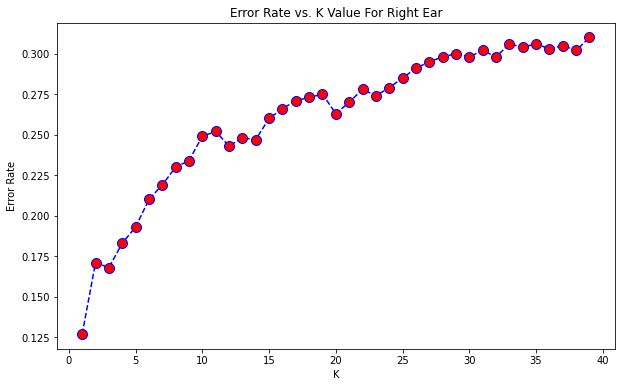

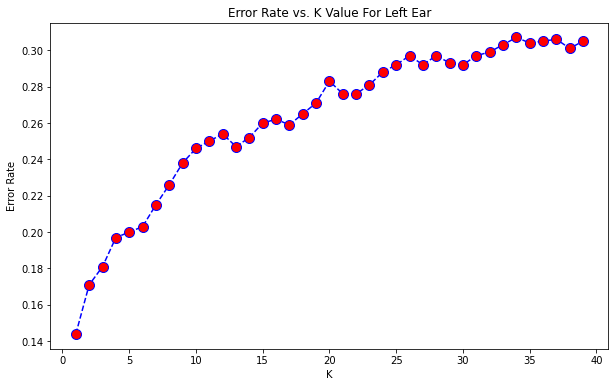

In [ ]:
# Checking the value of n_neighbors with least error

from sklearn.neighbors import KNeighborsClassifier

#Right Ear
knn_error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(r_x_train,r_y_train)
    pred_i = knn.predict(r_x_test)
    knn_error_rate.append(np.mean(pred_i != r_y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),knn_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value For Right Ear')
plt.xlabel('K')
plt.ylabel('Error Rate')

#Left Ear
knn_error_rate_l = []

for i in range(1,40):
    
    knn_l = KNeighborsClassifier(n_neighbors=i)
    knn_l.fit(l_x_train,l_y_train)
    pred_i_l = knn_l.predict(l_x_test)
    knn_error_rate_l.append(np.mean(pred_i_l != l_y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),knn_error_rate_l,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value For Left Ear')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
# Loading Model

#Right Ear

knn_r = KNeighborsClassifier(n_neighbors=1)
knn_r.fit(r_x_train,r_y_train)
pred = knn_r.predict(r_x_test)
print('CLASSIFICATION REPORT OF RIGHT EAR: ', classification_report(r_y_test,pred))


#Left Ear

knn_l = KNeighborsClassifier(n_neighbors=1)
knn_l.fit(l_x_train,l_y_train)
pred_l = knn_l.predict(l_x_test)
print('CLASSIFICATION REPORT OF LEFT EAR: ', classification_report(l_y_test,pred_l))

CLASSIFICATION REPORT OF RIGHT EAR:                precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.84      0.77      0.80        87
           2       0.87      0.95      0.91        63
           3       0.90      0.87      0.88        30
           4       0.80      0.85      0.83        61
           5       0.93      0.81      0.87        32
           6       0.94      0.86      0.90        35
           7       0.77      0.88      0.82        88
           8       0.91      0.86      0.88        92
           9       0.88      0.90      0.89        31
          10       0.89      0.74      0.81        65
          11       0.81      0.76      0.78        45
          12       0.93      0.96      0.94        93
          13       0.93      0.98      0.95       105
          14       0.87      1.00      0.93        41
          15       0.95      0.84      0.89        63
          16       0.77      0.88      0.82 

**RANDOM FOREST**

Text(0, 0.5, 'Error Rate')

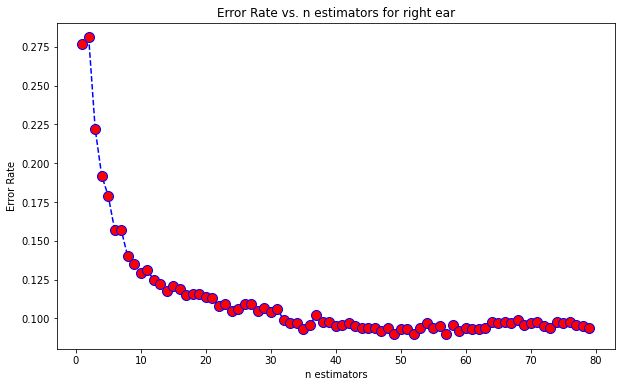

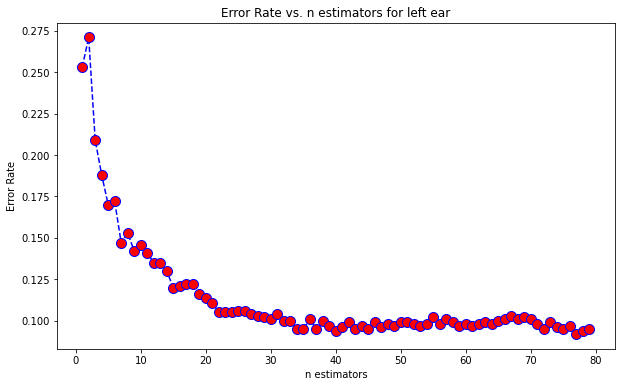

In [ ]:
# Checking the value of n_estimators with least error

from sklearn.ensemble import RandomForestClassifier


#Right Ear
r_error_rate = []

for i in range(1,80):
    
    r_rfc = RandomForestClassifier(random_state = 100, n_estimators=i)
    r_rfc.fit(r_x_train,r_y_train)
    r_predictions = r_rfc.predict(r_x_test)
    r_error_rate.append(np.mean(r_predictions != r_y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,80),r_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n estimators for right ear')
plt.xlabel('n estimators')
plt.ylabel('Error Rate')

#Left Ear
l_error_rate = []

for i in range(1,80):
    
    l_rfc = RandomForestClassifier(random_state = 100, n_estimators=i)
    l_rfc.fit(l_x_train,l_y_train)
    l_predictions = l_rfc.predict(l_x_test)
    l_error_rate.append(np.mean(l_predictions != l_y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,80),l_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n estimators for left ear')
plt.xlabel('n estimators')
plt.ylabel('Error Rate')

In [ ]:
#Right Ear

l1_rfc = RandomForestClassifier(random_state = 100, n_estimators=78)
l1_rfc.fit(l_x_train,l_y_train)
l1_predictions = l1_rfc.predict(l_x_test)
print('CLASSIFICATION REPORT OF LEFT EAR: ', classification_report(l_y_test, l1_predictions))


#Left Ear

l1_rfc = RandomForestClassifier(random_state = 100, n_estimators=78)
l1_rfc.fit(l_x_train,l_y_train)
l1_predictions = l1_rfc.predict(l_x_test)
print('CLASSIFICATION REPORT OF LEFT EAR: ', classification_report(l_y_test, l1_predictions))

CLASSIFICATION REPORT OF LEFT EAR:                precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.85      0.89      0.87        84
           2       0.92      0.96      0.94        74
           3       0.92      0.92      0.92        36
           4       0.82      0.82      0.82        44
           5       1.00      0.82      0.90        28
           6       0.84      0.90      0.87        30
           7       0.93      0.89      0.91        95
           8       0.92      0.92      0.92        86
           9       0.82      0.82      0.82        40
          10       0.88      0.87      0.87        60
          11       0.85      0.89      0.87        45
          12       0.96      0.98      0.97       100
          13       0.98      0.94      0.96       101
          14       0.87      0.93      0.90        44
          15       0.95      0.86      0.90        65
          16       0.79      0.90      0.84  

**MODEL ACCURACY SCORES**

In [ ]:

from sklearn import metrics

print('ACCURACY OF MODELS FOR RIGHT EAR: \n')

print(' Accuracy of Logistic Regression: ', metrics.accuracy_score(r_y_test,r_predictions_lr),'\n')
print(' Accuracy of Naive Bayes: ', metrics.accuracy_score(r_y_test, r_pred),'\n')
print(' Accuracy of Decision Tree: ', metrics.accuracy_score(r_y_test,r_predictions_dt),'\n')
print(' Accuracy of SVM: ', metrics.accuracy_score(r_y_test,r_predictions_svm),'\n')
print(' Accuracy of KNN: ', metrics.accuracy_score(r_y_test,pred),'\n')
print(' Accuracy of Random Forest: ', metrics.accuracy_score(r_y_test, r_predictions),'\n')


print('\nACCURACY OF MODELS FOR LEFT EAR: \n')

print(' Accuracy of Logistic Regression: ', metrics.accuracy_score(l_y_test,l_predictions_lr),'\n')
print(' Accuracy of Naive Bayes: ', metrics.accuracy_score(l_y_test, l_pred),'\n')
print(' Accuracy of Decision Tree: ', metrics.accuracy_score(l_y_test,l_predictions_dt),'\n')
print(' Accuracy of SVM: ', metrics.accuracy_score(l_y_test,l_predictions_svm),'\n')
print(' Accuracy of KNN: ', metrics.accuracy_score(l_y_test,pred_l),'\n')
print(' Accuracy of Random Forest: ', metrics.accuracy_score(l_y_test, l_predictions),'\n')

ACCURACY OF MODELS FOR RIGHT EAR: 

 Accuracy of Logistic Regression:  0.329 

 Accuracy of Naive Bayes:  0.653 

 Accuracy of Decision Tree:  0.807 

 Accuracy of SVM:  0.838 

 Accuracy of KNN:  0.873 

 Accuracy of Random Forest:  0.906 


ACCURACY OF MODELS FOR LEFT EAR: 

 Accuracy of Logistic Regression:  0.349 

 Accuracy of Naive Bayes:  0.633 

 Accuracy of Decision Tree:  0.825 

 Accuracy of SVM:  0.846 

 Accuracy of KNN:  0.856 

 Accuracy of Random Forest:  0.905 



In [ ]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
''' On the basis of accuracy score our base learners will be SVM, Naive Bayes and Decision Tree.
    While the meta learner will be Random Forest''' 
estimator = [('knn', make_pipeline(knn_r)), ('svm', make_pipeline(svm_r)), ('dt', make_pipeline(dtree_r))]
stacking_cl = StackingClassifier(estimator, final_estimator = r1_rfc)
stacking_cl.fit(r_x_train, r_y_train)

stcl_predictions = stacking_cl.predict(r_x_test)
print('CLASSIFICATION REPORT OF LEFT EAR  FOR STACKING MODEL: ', classification_report(r_y_test, stcl_predictions))

CLASSIFICATION REPORT OF LEFT EAR  FOR STACKING MODEL:                precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.93      0.82      0.87        87
           2       0.92      0.90      0.91        63
           3       0.97      1.00      0.98        30
           4       0.95      0.90      0.92        61
           5       0.94      0.94      0.94        32
           6       0.97      1.00      0.99        35
           7       0.86      0.95      0.90        88
           8       0.91      0.90      0.91        92
           9       1.00      1.00      1.00        31
          10       0.94      0.89      0.91        65
          11       0.83      0.87      0.85        45
          12       0.98      1.00      0.99        93
          13       0.98      0.99      0.99       105
          14       0.91      1.00      0.95        41
          15       0.97      0.92      0.94        63
          16       0.89  

**PREDICTING %DISABILITY**

In [ ]:
# Dropping unwanted columns

data_disability = data.drop(columns = ['R_AC_250_Hz', 'R_AC_500_Hz', 'R_AC_1K_Hz', 'R_AC_2K_Hz',
       'R_AC_4K_Hz', 'R_BC_250_Hz', 'R_BC_500_Hz', 'R_BC_1K_Hz', 'R_BC_2K_Hz',
       'R_BC_4K_Hz', 'L_AC_250_Hz', 'L_AC_500_Hz', 'L_AC_1K_Hz',
       'L_AC_2K_Hz', 'L_AC_4K_Hz', 'L_BC_250_Hz', 'L_BC_500_Hz', 'L_BC_1K_Hz',
       'L_BC_2K_Hz', 'L_BC_4K_Hz', 'R_Diagnosis', 'L_Diagnosis', 'R_Average', 'L_Average'])
data_disability

,R_Pr_Disability,L_Pr_Disability,Total Disability
0,100.00,51.97,59.975000
1,98.14,0.00,16.356667
2,100.00,14.00,28.333333
3,100.00,48.55,57.125000
4,87.88,0.00,14.646667
...,...,...,...
4995,72.49,6.00,17.081667
4996,23.00,18.00,18.833333
4997,18.00,25.00,19.166667
4998,100.00,14.00,28.333333


In [ ]:
# Splitting data for testing and training

x_train, x_test, y_train, y_test = train_test_split(data_disability.drop(columns=['Total Disability']),data_disability['Total Disability'],test_size=0.2, random_state=101)

**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

regressor_lm = LinearRegression()
regressor_lm.fit(x_train,y_train)
lm_predictions = regressor_lm.predict(x_test)
print('R2 Score: ', metrics.r2_score(y_test, lm_predictions))

R2 Score:  0.8115740531115326


**SUPPORT VECTOR REGRESSION**

In [ ]:
from sklearn.svm import SVR

regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(x_train, y_train)
svr_predictions = regressor_svr.predict(x_test)
print('R2 Score: ', metrics.r2_score(y_test, svr_predictions))

R2 Score:  0.9942576104669072


**DECISION TREE REGRESSION**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(x_train, y_train)
dt_predictions = regressor_dt.predict(x_test)
print('R2 Score: ', metrics.r2_score(y_test, dt_predictions))

R2 Score:  0.9972646072167209


**RANDOM FOREST REGRESSION**

Text(0, 0.5, 'Error Rate')

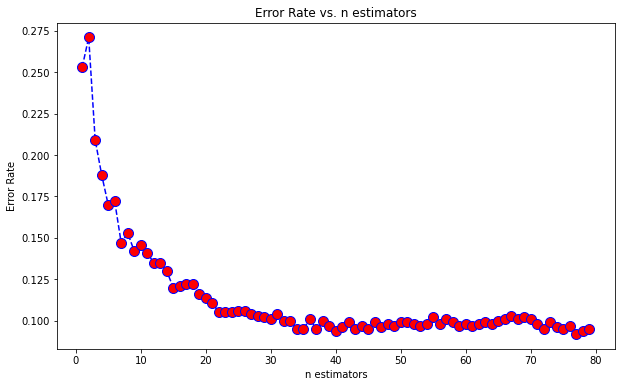

In [ ]:
# Checking the value of n_estimators with least error

from sklearn.ensemble import RandomForestRegressor

error_rate = []

for i in range(1,80):
    
    rfcr = RandomForestRegressor(random_state = 100, n_estimators=i)
    rfcr.fit(x_train, y_train)
    rfcr_predictions = rfcr.predict(x_test)
    error_rate.append(np.mean(rfcr_predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,80),l_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n estimators')
plt.xlabel('n estimators')
plt.ylabel('Error Rate')


In [ ]:
# Loading Model

regressor_rf = RandomForestRegressor(random_state = 100, n_estimators = 40)
regressor_rf.fit(x_train, y_train)
rf_predictions = regressor_rf.predict(x_test)
print('R2 Score: ', metrics.r2_score(y_test, rf_predictions))

R2 Score:  0.9991005663822172


**MODEL ACCURACY SCORES**

In [ ]:
# Getting accuracy score of all models

print('ACCURACY OF MODELS : \n')
print('R2 Score Of Linear Regression: ', metrics.r2_score(y_test, lm_predictions), '\n')
print('R2 Score Of Support Vector Regression: ', metrics.r2_score(y_test, svr_predictions), '\n')
print('R2 Score Of Decision Tree Regression: ', metrics.r2_score(y_test, dt_predictions), '\n')
print('R2 Score Of Random Forest Regression: ', metrics.r2_score(y_test, rf_predictions), '\n')

ACCURACY OF MODELS : 

R2 Score Of Linear Regression:  0.8115740531115326 

R2 Score Of Support Vector Regression:  0.9942576104669072 

R2 Score Of Decision Tree Regression:  0.9972646072167209 

R2 Score Of Random Forest Regression:  0.9991005663822172 

